<a href="https://colab.research.google.com/github/seecode4/seeRepo1/blob/main/Student_MLE_MiniProjects/Student_MLE_MiniProject_Trees_and_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [2]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

In [3]:
# Data in a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
print("Shape:", df.shape, "Num features:", len(df.columns))
print("Columns:\n", df.columns)

Shape: (569, 30) Num features: 30
Columns:
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [4]:
# Create target variable
df['target'] = data.target
print(df['target'].value_counts(), df.shape)
print(data.target_names, data.target[[10, 50, 85]])

target
1    357
0    212
Name: count, dtype: int64 (569, 31)
['malignant' 'benign'] [0 1 0]


In [5]:
# Split the dataset into training and testing sets - train test split is 75%-25%
from sklearn.preprocessing import StandardScaler
feature_list = df.columns[:-1]
X_train1, X_test1, y_train1, y_test1 = train_test_split(df[feature_list],
                                                    df['target'],
                                                    random_state=0,
                                                    test_size=0.25)
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train1)

# Apply transform to both the training set and the test set.
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)
print(len(X_train1) , len(X_test1))

426 143


In [6]:
# Split the dataset into training and testing sets - train test split is 80%-20%
from sklearn.preprocessing import StandardScaler
feature_list = df.columns[:-1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[feature_list],
                                                    df['target'],
                                                    random_state=0,
                                                    test_size=0.2)
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train2)

# Apply transform to both the training set and the test set.
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)
print(len(X_train2) , len(X_test2))

455 114


In [7]:
# Display first 5 rows
print("Head:\n", df.head())

Head:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0      

Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [8]:
# Create a Decision Tree model - use X_train1 max_depth 4
clfdt1_md4 = DecisionTreeClassifier(max_depth = 4,
                             random_state = 0)
clfdt1_md4.fit(X_train1, y_train1)

# Predict for One Observation (image)
# clf.predict(X_test1[0].values.reshape(1, -1))

# Predict for Multiple Observations
clfdt1_md4.predict(X_test1[0:5])

importances1_md4 = pd.Series(clfdt1_md4.feature_importances_, index=feature_list)
decisiontree_importances1_md4 = importances1_md4.sort_values(ascending=False)
print(decisiontree_importances1_md4[decisiontree_importances1_md4 > 0.009])

mean concave points        0.721000
worst area                 0.117221
worst texture              0.050978
worst compactness          0.035260
perimeter error            0.020077
area error                 0.017275
worst fractal dimension    0.015513
symmetry error             0.012411
worst concavity            0.010265
dtype: float64


In [9]:
# Create a Decision Tree model - use X_train1 max_depth 6
clfdt1_md6 = DecisionTreeClassifier(max_depth = 6,
                             random_state = 0)
clfdt1_md6.fit(X_train1, y_train1)

# Predict for One Observation (image)
# clf.predict(X_test1[0].values.reshape(1, -1))

# Predict for Multiple Observations
clfdt1_md6.predict(X_test1[0:5])

importances1_md6 = pd.Series(clfdt1_md6.feature_importances_, index=feature_list)
decisiontree_importances1_md6 = importances1_md6.sort_values(ascending=False)
print(decisiontree_importances1_md6[decisiontree_importances1_md6 > 0.009])

mean concave points        0.706404
worst area                 0.114848
worst texture              0.052517
worst concavity            0.034756
radius error               0.019671
smoothness error           0.017673
area error                 0.016925
mean texture               0.015199
fractal dimension error    0.012159
worst compactness          0.009847
dtype: float64


In [10]:
# Create a Decision Tree model - use X_train2 max_depth 4
clfdt2_md4 = DecisionTreeClassifier(max_depth = 4,
                             random_state = 0)
clfdt2_md4.fit(X_train2, y_train2)

# Predict for One Observation (image)
# clf.predict(X_test1[0].values.reshape(1, -1))

# Predict for Multiple Observations
clfdt2_md4.predict(X_test2[0:5])

importances2_md4 = pd.Series(clfdt2_md4.feature_importances_, index=feature_list)
decisiontree_importances2_md4 = importances2_md4.sort_values(ascending=False)
print(decisiontree_importances2_md4[decisiontree_importances2_md4 > 0.009])

worst concave points       0.739725
worst area                 0.138341
mean smoothness            0.034808
mean area                  0.024081
mean symmetry              0.017598
worst perimeter            0.015914
worst concavity            0.009931
worst fractal dimension    0.009815
area error                 0.009787
dtype: float64


In [11]:
# Create a Decision Tree model - use X_train2 max_depth 6
clfdt2_md6 = DecisionTreeClassifier(max_depth = 6,
                             random_state = 0)
clfdt2_md6.fit(X_train2, y_train2)

# Predict for One Observation (image)
# clf.predict(X_test1[0].values.reshape(1, -1))

# Predict for Multiple Observations
clfdt2_md6.predict(X_test2[0:5])

importances2_md6 = pd.Series(clfdt2_md6.feature_importances_, index=feature_list)
decisiontree_importances2_md6 = importances2_md6.sort_values(ascending=False)
print(decisiontree_importances2_md6[decisiontree_importances2_md6 > 0.009])

worst concave points       0.710754
worst area                 0.132923
mean smoothness            0.033445
smoothness error           0.024712
mean perimeter             0.023138
mean symmetry              0.016908
worst perimeter            0.015291
texture error              0.009542
worst fractal dimension    0.009431
worst concavity            0.009403
dtype: float64


In [36]:
# Create a Decision Tree model - use X_train2 max_leaf_nodes 8
clfdt2_ml8 = DecisionTreeClassifier(max_leaf_nodes = 8,
                             random_state = 0)
clfdt2_ml8.fit(X_train2, y_train2)

# Predict for One Observation (image)
# clf.predict(X_test1[0].values.reshape(1, -1))

# Predict for Multiple Observations
clfdt2_ml8.predict(X_test2[0:5])

importances2_ml8 = pd.Series(clfdt2_ml8.feature_importances_, index=feature_list)
decisiontree_importances2_ml8 = importances2_ml8.sort_values(ascending=False)
print(decisiontree_importances2_ml8[decisiontree_importances2_ml8 > 0.009])

worst concave points    0.762236
worst area              0.142551
mean smoothness         0.035868
mean radius             0.024814
mean symmetry           0.018133
worst perimeter         0.016399
dtype: float64


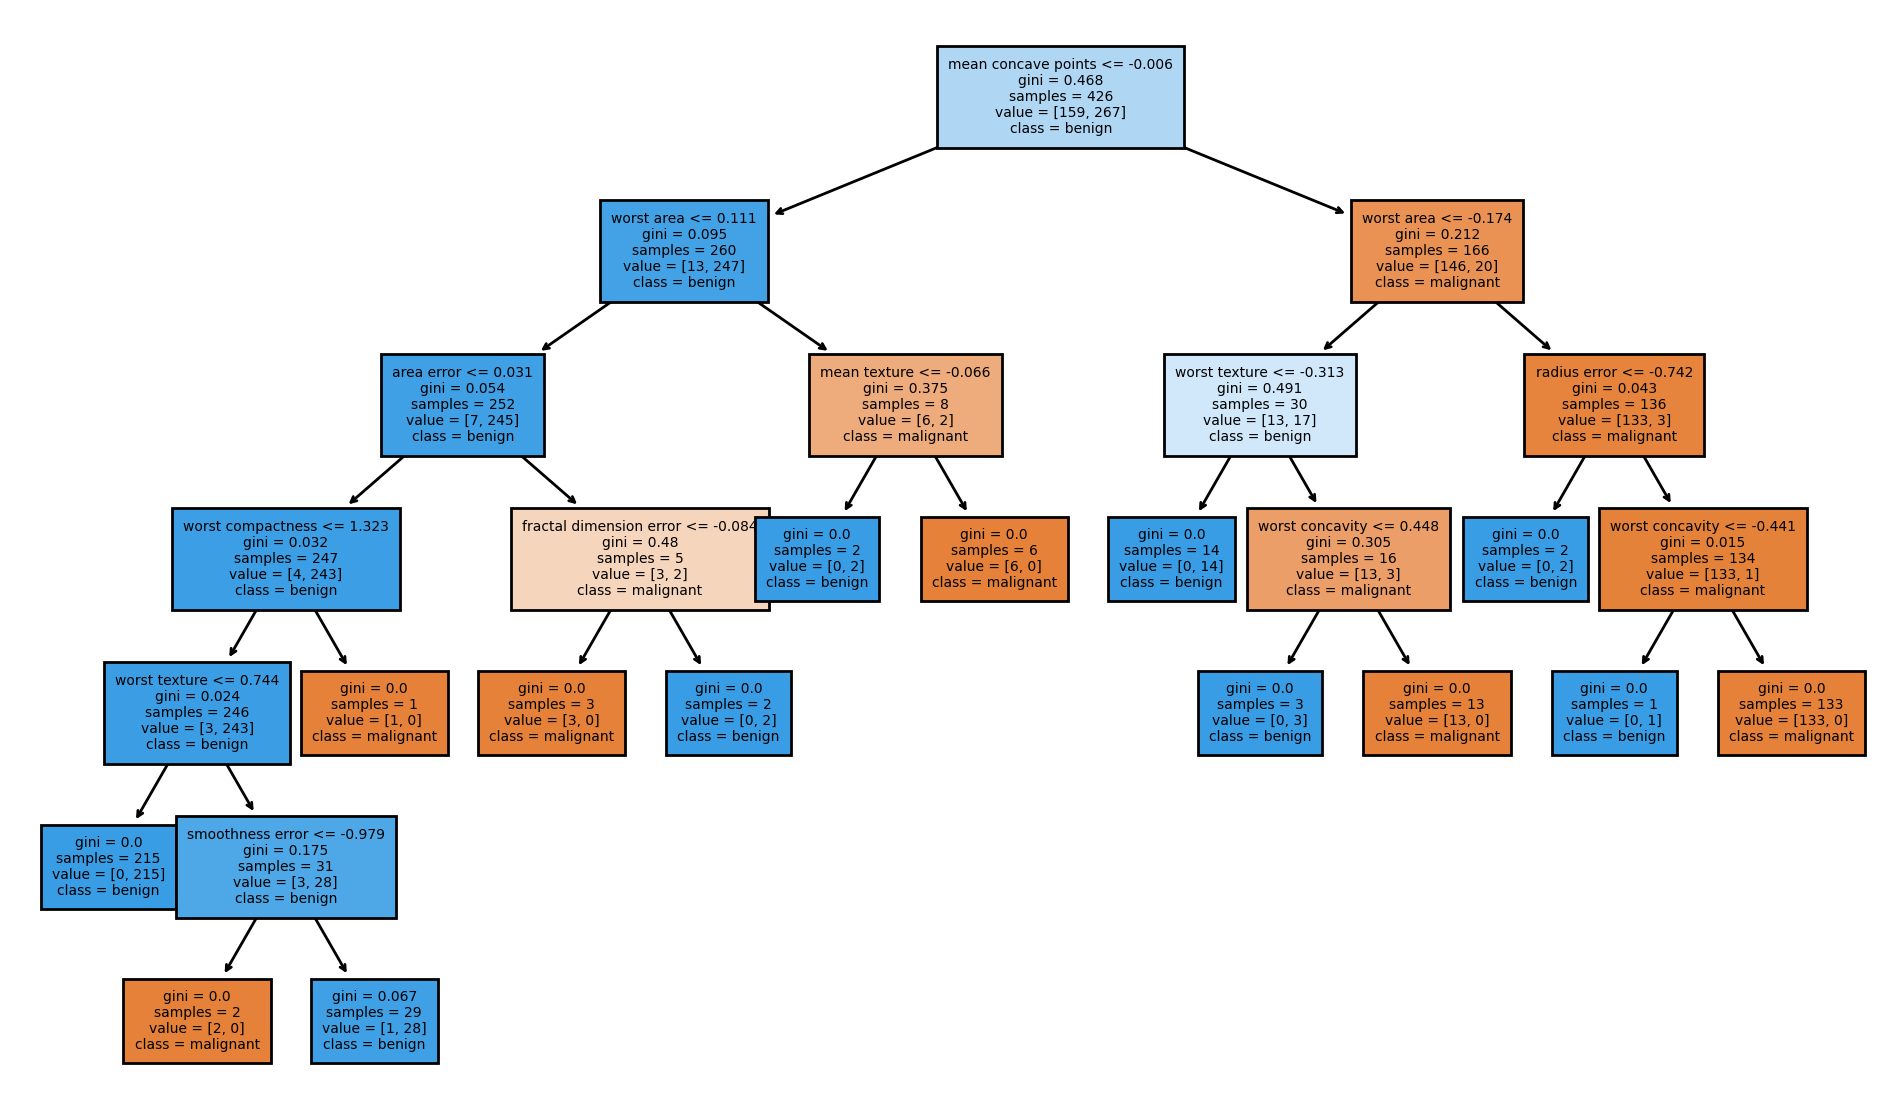

In [12]:
# Visualize the Decision Tree - clfdt1_md6
from sklearn import tree

fig, axes = plt.subplots(figsize = (12, 7), dpi = 200)
fn = feature_list
cn = data.target_names
tree.plot_tree(clfdt1_md6, feature_names = fn, class_names = cn, filled = True, fontsize=5);

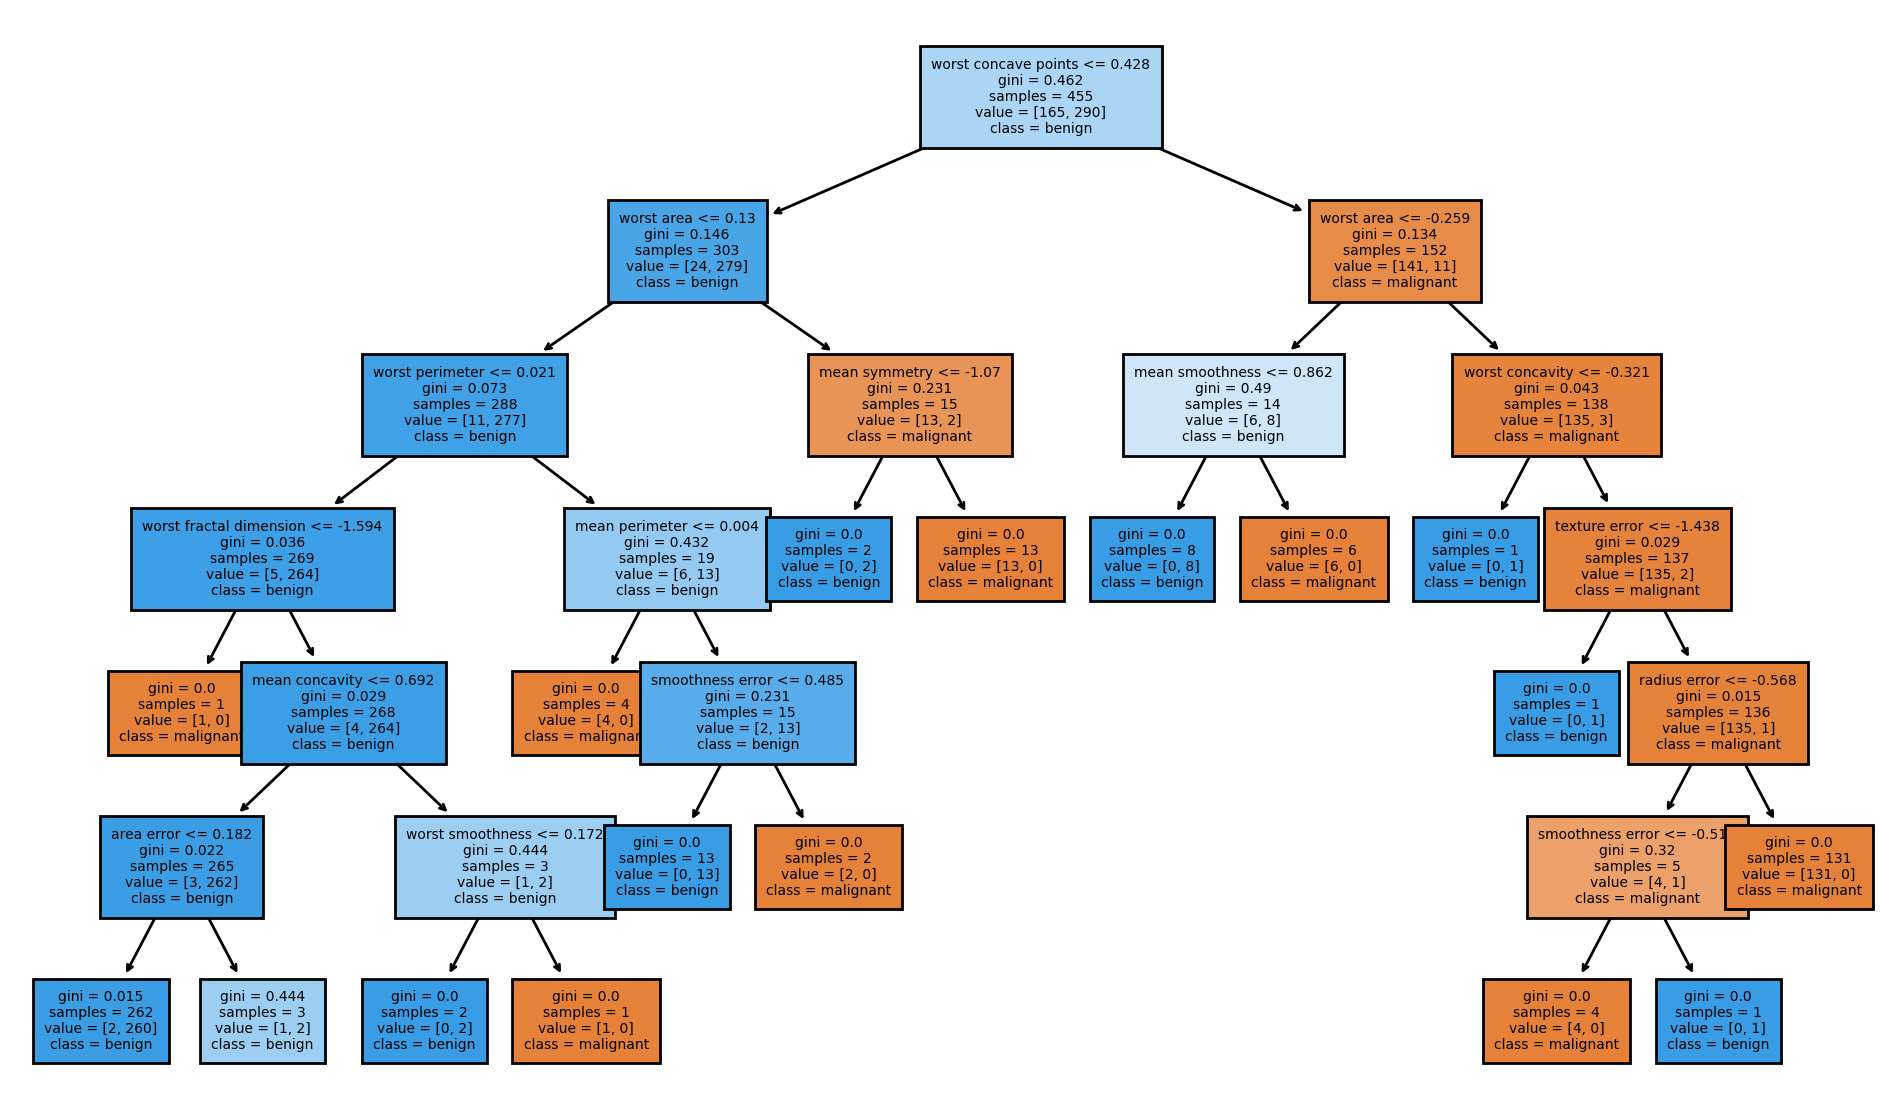

In [13]:
# Visualize the Decision Tree - clfdt2_md6
from sklearn import tree

fig, axes = plt.subplots(figsize = (12, 7), dpi = 200)
fn = feature_list
cn = data.target_names
tree.plot_tree(clfdt2_md6, feature_names = fn, class_names = cn, filled = True, fontsize=5);

Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [21]:
# Train random forest model X_train2 n_estimators = 40
clfrf2_n40 = RandomForestClassifier(n_estimators = 40, n_jobs=-1, random_state=0)
clfrf2_n40.fit(X_train2, y_train2)

# Extract feature importances X_train2 n_estimators = 40
importances2_n40 = pd.Series(clfrf2_n40.feature_importances_, index=feature_list)
forest_importances2_n40 = importances2_n40.sort_values(ascending=False)

# Print feature importance
# print(forest_importances2_n40[forest_importances2_n40 > 0.009])
print(forest_importances2_n40)

# std1_n40 = np.std([tree.feature_importances_ for tree in clfrf2_n40.estimators_], axis=0)
# print(std1_n40)

worst perimeter            0.173262
mean concave points        0.130750
worst area                 0.121311
worst concave points       0.117318
worst radius               0.097352
mean concavity             0.072810
mean perimeter             0.035169
mean area                  0.030357
area error                 0.028094
mean radius                0.021248
worst concavity            0.020622
mean texture               0.019344
radius error               0.018673
worst compactness          0.014191
worst texture              0.013752
mean compactness           0.009342
worst fractal dimension    0.009008
worst smoothness           0.008404
concavity error            0.007049
mean smoothness            0.005953
symmetry error             0.005708
smoothness error           0.005609
worst symmetry             0.005436
perimeter error            0.005370
fractal dimension error    0.004734
concave points error       0.004719
mean symmetry              0.004706
mean fractal dimension     0

In [15]:
# Train random forest model X_train2 n_estimators = 60
clfrf2_n60 = RandomForestClassifier(n_estimators = 60, n_jobs=-1, random_state=0)
clfrf2_n60.fit(X_train2, y_train2)

# Extract feature importances X_train1 n_estimators = 60
importances2_n60 = pd.Series(clfrf2_n60.feature_importances_, index=feature_list)
forest_importances2_n60 = importances2_n60.sort_values(ascending=False)

# Print feature importance
print(forest_importances2_n60[forest_importances2_n60 > 0.009])

worst perimeter         0.159187
worst concave points    0.126911
worst radius            0.102066
worst area              0.099523
mean concave points     0.097569
mean concavity          0.065067
mean radius             0.046114
mean perimeter          0.044990
mean area               0.044394
area error              0.037569
radius error            0.021804
worst concavity         0.020882
worst texture           0.017170
mean texture            0.014842
worst smoothness        0.012633
worst compactness       0.011534
worst symmetry          0.011454
dtype: float64


In [16]:
# Train random forest model X_train2 n_estimators = 100
clfrf2_n100 = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0)
clfrf2_n100.fit(X_train2, y_train2)

# Extract feature importances X_train1 n_estimators = 100
importances2_n100 = pd.Series(clfrf2_n100.feature_importances_, index=feature_list)
forest_importances2_n100 = importances2_n100.sort_values(ascending=False)

# Print feature importance
print(forest_importances2_n100[forest_importances2_n100 > 0.009])

worst perimeter            0.172054
worst concave points       0.142027
worst radius               0.095563
mean concave points        0.086691
mean concavity             0.079866
mean perimeter             0.060164
worst area                 0.050653
area error                 0.038800
mean area                  0.037145
mean radius                0.036996
worst concavity            0.024432
radius error               0.024074
worst texture              0.018593
worst compactness          0.015655
mean texture               0.015613
perimeter error            0.012544
worst fractal dimension    0.010013
mean compactness           0.009660
worst symmetry             0.009649
worst smoothness           0.009431
dtype: float64


AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


In [24]:
# Build and train an AdaBoostClassifier on your training data.
# Create a decision tree classifier as the base model
base_model = DecisionTreeClassifier(max_depth=1)

# AdaBoostClassifier with X_train2, n_estimators 40
clfab2_n40 = AdaBoostClassifier(estimator=base_model, n_estimators=40, random_state=0)
# clfab22_n100 = AdaBoostClassifier(estimator='DecisionTreeClassifier', n_estimators=100, random_state=0)
clfab2_n40.fit(X_train2, y_train2)

importances2_n40 = pd.Series(clfab2_n40.feature_importances_, index=feature_list)
ab_importances2_n40 = importances2_n40.sort_values(ascending=False)
# print(ab_importances2_n40[ab_importances2_n40 > 0.009])
print(ab_importances2_n40)

worst area                 0.125
worst concave points       0.075
worst concavity            0.075
worst texture              0.075
fractal dimension error    0.075
area error                 0.075
mean texture               0.075
compactness error          0.050
mean smoothness            0.050
mean concave points        0.050
perimeter error            0.050
concavity error            0.025
worst smoothness           0.025
worst perimeter            0.025
worst radius               0.025
symmetry error             0.025
worst fractal dimension    0.025
texture error              0.025
mean symmetry              0.025
mean compactness           0.025
concave points error       0.000
smoothness error           0.000
radius error               0.000
mean fractal dimension     0.000
mean concavity             0.000
worst compactness          0.000
mean area                  0.000
mean perimeter             0.000
worst symmetry             0.000
mean radius                0.000
dtype: flo

In [25]:
# Create a decision tree classifier as the base model
base_model = DecisionTreeClassifier(max_depth=1)

# AdaBoostClassifier with X_train2, n_estimators 100
clfab2_n100 = AdaBoostClassifier(estimator=base_model, n_estimators=100, random_state=0)
# clfab22_n100 = AdaBoostClassifier(estimator='DecisionTreeClassifier', n_estimators=100, random_state=0)
clfab2_n100.fit(X_train2, y_train2)

importances2_n100 = pd.Series(clfab2_n100.feature_importances_, index=feature_list)
ab_importances2_n100 = importances2_n100.sort_values(ascending=False)
print(ab_importances2_n100[ab_importances2_n100 > 0.009])

area error                 0.09
worst texture              0.08
worst concavity            0.06
mean texture               0.06
mean compactness           0.06
worst area                 0.06
fractal dimension error    0.06
mean concave points        0.05
texture error              0.04
worst perimeter            0.04
perimeter error            0.04
compactness error          0.04
worst concave points       0.04
mean smoothness            0.04
symmetry error             0.04
mean symmetry              0.03
mean area                  0.03
worst symmetry             0.03
worst smoothness           0.02
worst fractal dimension    0.02
radius error               0.02
worst radius               0.01
concavity error            0.01
smoothness error           0.01
mean fractal dimension     0.01
mean concavity             0.01
dtype: float64


In [27]:
# Create a decision tree classifier as the base model
base_model = DecisionTreeClassifier(max_depth=6)

# AdaBoostClassifier with X_train2, n_estimators 100
clfab2_md6_n100 = AdaBoostClassifier(estimator=base_model, n_estimators=100, random_state=0)
# clfab22_n100 = AdaBoostClassifier(estimator='DecisionTreeClassifier', n_estimators=100, random_state=0)
clfab2_md6_n100.fit(X_train2, y_train2)

importances2_md6_n100 = pd.Series(clfab2_md6_n100.feature_importances_, index=feature_list)
ab_importances2_md6_n100 = importances2_md6_n100.sort_values(ascending=False)
print(ab_importances2_md6_n100[ab_importances2_md6_n100 > 0.009])

worst texture           0.296037
mean concavity          0.229347
worst concave points    0.179314
worst area              0.064907
worst compactness       0.044696
mean texture            0.039697
worst radius            0.038102
worst symmetry          0.032659
compactness error       0.018432
radius error            0.012763
perimeter error         0.009687
dtype: float64


In [38]:
# Create a decision tree classifier as the base model
base_model = DecisionTreeClassifier(max_leaf_nodes=8)

# AdaBoostClassifier with X_train2, n_estimators 100
clfab2_ml8_n100 = AdaBoostClassifier(estimator=base_model, n_estimators=100, random_state=0)
# clfab22_n100 = AdaBoostClassifier(estimator='DecisionTreeClassifier', n_estimators=100, random_state=0)
clfab2_ml8_n100.fit(X_train2, y_train2)

importances2_ml8_n100 = pd.Series(clfab2_ml8_n100.feature_importances_, index=feature_list)
ab_importances2_ml8_n100 = importances2_ml8_n100.sort_values(ascending=False)
print(ab_importances2_ml8_n100[ab_importances2_ml8_n100 > 0.009])

worst texture              0.075503
area error                 0.073583
mean texture               0.071973
worst area                 0.062164
worst perimeter            0.057365
worst concave points       0.055830
mean concave points        0.054820
worst smoothness           0.048038
worst concavity            0.043968
mean symmetry              0.041471
compactness error          0.039468
fractal dimension error    0.038829
mean smoothness            0.037004
texture error              0.031381
mean concavity             0.030200
worst fractal dimension    0.029813
radius error               0.027291
worst symmetry             0.026371
smoothness error           0.020646
mean compactness           0.019392
concave points error       0.016949
concavity error            0.015509
symmetry error             0.015477
worst compactness          0.015256
mean area                  0.014344
mean fractal dimension     0.011517
worst radius               0.011415
dtype: float64


In [39]:
# Evaluate models

print("\nTop 5 features DecisionTree X_train1 max_depth 6:\n", decisiontree_importances1_md6[0:5])
print("\nTop 5 features DecisionTree X_train2 max_depth 6 :\n", decisiontree_importances2_md6[0:5])
print("\nTop 5 features DecisionTree X_train2 max_leaf_nodes 8:\n", decisiontree_importances2_ml8[0:5])
print("\nTop 5 features RandomForest X_train2 n_est 40:\n", forest_importances2_n40[0:5])
print("\nTop 5 features RandomForest X_train2 n_est 60:\n", forest_importances2_n60[0:5])
print("\nTop 5 features RandomForest X_train2 n_est 100:\n", forest_importances2_n100[0:5])
print("\nTop 5 features AdaBoost X_train2 n_est 40:\n", ab_importances2_n40[0:5])
print("\nTop 5 features AdaBoost X_train2 n_est 100:\n", ab_importances2_n100[0:5])
print("\nTop 5 features AdaBoost X_train2 maxDepth 6 n_est 100:\n", ab_importances2_md6_n100[0:5])
print("\nTop 5 features AdaBoost X_train2 max_leaf_nodes 8 n_est 100:\n", ab_importances2_ml8_n100[0:5])


Top 5 features DecisionTree X_train1 max_depth 6:
 mean concave points    0.706404
worst area             0.114848
worst texture          0.052517
worst concavity        0.034756
radius error           0.019671
dtype: float64

Top 5 features DecisionTree X_train2 max_depth 6 :
 worst concave points    0.710754
worst area              0.132923
mean smoothness         0.033445
smoothness error        0.024712
mean perimeter          0.023138
dtype: float64

Top 5 features DecisionTree X_train2 max_leaf_nodes 8:
 worst concave points    0.762236
worst area              0.142551
mean smoothness         0.035868
mean radius             0.024814
mean symmetry           0.018133
dtype: float64

Top 5 features RandomForest X_train2 n_est 40:
 worst perimeter         0.173262
mean concave points     0.130750
worst area              0.121311
worst concave points    0.117318
worst radius            0.097352
dtype: float64

Top 5 features RandomForest X_train2 n_est 60:
 worst perimeter         0

In [41]:
# Print accuracy scores for the various models
print('\n---------')
scoredt1_md6 = clfdt1_md6.score(X_test1, y_test1)
print("Score DecisionTreeClassifier X_train1 maxDepth 6:", scoredt1_md6)

scoredt2_md6 = clfdt2_md6.score(X_test2, y_test2)
print("Score DecisionTreeClassifier X_train2 maxDepth 6:", scoredt2_md6)

scoredt2_ml8 = clfdt2_ml8.score(X_test2, y_test2)
print("Score DecisionTreeClassifier X_train2 maxLeafNodes 8:", scoredt2_ml8)

scorerf2_n40 = clfrf2_n40.score(X_test2, y_test2)
print("Score RandomForestClassifier X_train2 n_est 40:", scorerf2_n40)

scorerf2_n60 = clfrf2_n60.score(X_test2, y_test2)
print("Score RandomForestClassifier X_train2 n_est 60:", scorerf2_n60)

scorerf2_n100 = clfrf2_n100.score(X_test2, y_test2)
print("Score RandomForestClassifier X_train2 n_est 100:", scorerf2_n100)

scoreab2_n40 = clfab2_n40.score(X_test2, y_test2)
print("Score AdaBoostClassifier X_train2 maxDepth 1 n_est 40:",scoreab2_n40)

scoreab2_n100 = clfab2_n100.score(X_test2, y_test2)
print("Score AdaBoostClassifier X_train2 maxDepth 1 n_est 100:",scoreab2_n100)

scoreab2_md6_n100 = clfab2_md6_n100.score(X_test2, y_test2)
print("Score AdaBoostClassifier X_train2 maxDepth 6 n_est 100:",scoreab2_md6_n100)

scoreab2_ml8_n100 = clfab2_ml8_n100.score(X_test2, y_test2)
print("Score AdaBoostClassifier X_train2 maxLeafNodes 8 n_est 100:",scoreab2_ml8_n100)


---------
Score DecisionTreeClassifier X_train1 maxDepth 6: 0.9230769230769231
Score DecisionTreeClassifier X_train2 maxDepth 6: 0.9473684210526315
Score DecisionTreeClassifier X_train2 maxLeafNodes 8: 0.956140350877193
Score RandomForestClassifier X_train2 n_est 40: 0.9649122807017544
Score RandomForestClassifier X_train2 n_est 60: 0.956140350877193
Score RandomForestClassifier X_train2 n_est 100: 0.9649122807017544
Score AdaBoostClassifier X_train2 maxDepth 1 n_est 40: 0.9649122807017544
Score AdaBoostClassifier X_train2 maxDepth 1 n_est 100: 0.9649122807017544
Score AdaBoostClassifier X_train2 maxDepth 6 n_est 100: 0.9473684210526315
Score AdaBoostClassifier X_train2 maxLeafNodes 8 n_est 100: 0.9912280701754386


Summary: <br>
The top 5 features of importance for each of the models is as above. They are not consistent across models. <br>
From the earlier exercise, since there is multi-collinearity between features, it is possible each model picks a different feature as most important.

Also see that the features of importance change when
*   Decision Tree training set size is changed from 75% to 80%
*   Number of Random Forest Estimators changed from 40 to 60 to 100

With the same test data, in general it appears that
*   AdaBoostClassifier score is better than that for RandomForestClassifier
*   RandomForestClassifier score is better than for the DecisionTreeClassifier

However, on closer observation of scores, for the same train (80%) and test (20%) set
*   Decision Tree maxLeafNodes=8 matches Random Forest with n_estimators=60
*   Random Forest with n_estimators=40 matches that with n_estimators=100 and better than with n_estimators=60. It also matches the score with AdaBoostClassifier (with DecisionTree max_depth=1) n_estimators=40 or 100
*   AdaBoostClassifier (with DecisionTree max_leaf_nodes=8) n_estimators=100 gives the best score at over 99% accuracy

Thus the number of estimators, the amount of data and choice of hyperparameters do play a role in the accuracy of the predictions by the various classifiers